In [28]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 13.3 MB/s eta 0:00:00


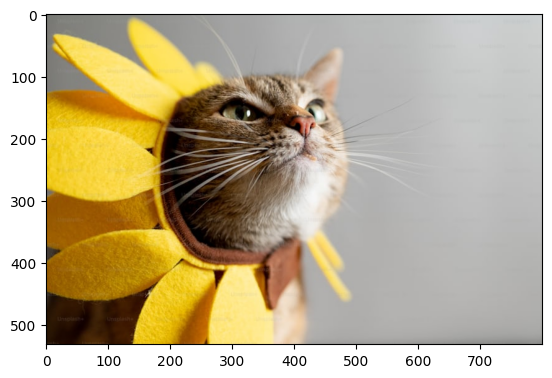

In [42]:
import requests
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

image_url = "https://plus.unsplash.com/premium_photo-1677545183884-421157b2da02?w=800&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8NXx8Y2F0fGVufDB8fDB8fHww"
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

plt.imshow(img)

In [43]:
from ultralytics import YOLO
import torchvision.transforms as transforms

# Transform image to be square with dimensions divisible by 32
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Adjusting to a 256x256 square
    transforms.ToTensor()
])

img_tensor = transform(img)
img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension to make it (1, 3, 640, 640)

# Load the pretrained YOLO model
model = YOLO("yolo11n-cls.pt")  # YOLO model trained on ImageNet

# Predict with the model on the transformed image
results = model(img_tensor)


0: 256x256 tabby 0.16, Egyptian_cat 0.14, corn 0.08, hamster 0.06, tiger_cat 0.06, 41.1ms
Speed: 0.0ms preprocess, 41.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 256)
